In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
COPDGene_dataset = pd.read_csv('/home/shussein/NetCO/data/COPDGene/COPDGene_P1P2P3_dataset_92.csv', index_col=0)
COPDGene_clinical_dataset = pd.read_csv('/home/shussein/NetCO/data/COPDGene/COPDGene_P1P2P3_SM_NS_Long_Oct23.csv', index_col=0, low_memory=False)

In [3]:
COPDGene_dataset_df = COPDGene_dataset.reset_index()
COPDGene_dataset_sorted_df = COPDGene_dataset_df.sort_values(by=['SID', 'Visitnum'], kind='mergesort')
COPDGene_dataset = COPDGene_dataset_sorted_df.set_index('SID')
COPDGene_dataset

,X10339_48,X11105_171,X11510_31,X13090_17,X14116_129,X2201_17,X2418_55,X2579_17,X2602_2,X2609_59,...,X5440_26,X5451_1,X5456_59,X5465_32,X5483_1,X5843_60,X6641_60,X7655_11,Visitnum,finalgold_visit
SID,,,,,,,,,,,,,,,,,,,,,
10062C,6274.1,47049.6,43046.1,5100.6,2520.1,80172.2,56127.4,15290.1,168.6,2100.4,...,4351.7,13583.3,5893.0,2174.4,17658.7,536.7,3119.1,2065.0,1,3.0
10062C,2646.7,9805.4,36470.0,3258.5,2767.4,88272.7,34986.8,27374.2,204.6,2254.7,...,5629.0,12577.5,4524.5,2115.6,15949.6,459.2,3194.0,12443.4,2,4.0
10062C,11002.4,15502.6,14270.2,1844.0,2103.9,14434.0,5760.9,11805.9,18877.2,2704.8,...,5194.6,8049.7,4715.0,1031.9,7634.9,1421.6,1206.1,11057.2,3,4.0
10077P,6419.4,10349.5,53052.6,3769.6,2782.2,77843.0,46411.8,12775.3,121.7,1938.0,...,4237.2,18476.6,8700.4,3281.0,17956.3,594.6,3324.0,5723.3,1,3.0
10077P,1895.8,5356.0,36965.1,2510.2,2131.4,76094.5,63130.9,24811.9,148.0,1925.1,...,3813.5,17033.6,6816.7,2943.0,16614.2,655.7,2119.5,9524.2,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449L,3031.2,6816.8,34293.6,1642.3,2351.4,80228.4,39769.7,21802.2,201.9,2200.7,...,2299.0,19332.0,5866.5,2626.4,16886.7,480.3,1484.7,18393.2,2,1.0
21449L,13493.7,13202.3,15621.2,1605.6,2012.4,14873.1,5186.3,9515.8,13753.1,2390.8,...,2095.7,10075.9,7174.9,1275.8,7879.4,1575.9,748.6,32826.5,3,0.0
22660M,4657.4,47978.0,38742.3,4482.7,2625.1,71015.4,72937.6,21938.5,123.6,2466.5,...,9558.1,16462.5,6855.7,3060.5,18883.1,578.6,2525.0,3187.9,1,0.0


In [5]:
# 1. Combine 'SID' and 'Visitnum' into a MultiIndex for COPDGene_dataset
filter_criteria = pd.MultiIndex.from_tuples(
       [(index, row['Visitnum']) for index, row in COPDGene_dataset.iterrows()],
       names=['SID', 'Visitnum']
)
# 2. Create a MultiIndex for COPDGene_clinical_dataset
COPDGene_clinical_dataset_index = pd.MultiIndex.from_tuples(
       [(index, row['visitnum']) for index, row in COPDGene_clinical_dataset.iterrows()],
       names=['sid', 'visitnum']
)
COPDGene_clinical_dataset = COPDGene_clinical_dataset[COPDGene_clinical_dataset_index.isin(filter_criteria)]
COPDGene_dataset

,X10339_48,X11105_171,X11510_31,X13090_17,X14116_129,X2201_17,X2418_55,X2579_17,X2602_2,X2609_59,...,X5440_26,X5451_1,X5456_59,X5465_32,X5483_1,X5843_60,X6641_60,X7655_11,Visitnum,finalgold_visit
SID,,,,,,,,,,,,,,,,,,,,,
10062C,6274.1,47049.6,43046.1,5100.6,2520.1,80172.2,56127.4,15290.1,168.6,2100.4,...,4351.7,13583.3,5893.0,2174.4,17658.7,536.7,3119.1,2065.0,1,3.0
10062C,2646.7,9805.4,36470.0,3258.5,2767.4,88272.7,34986.8,27374.2,204.6,2254.7,...,5629.0,12577.5,4524.5,2115.6,15949.6,459.2,3194.0,12443.4,2,4.0
10062C,11002.4,15502.6,14270.2,1844.0,2103.9,14434.0,5760.9,11805.9,18877.2,2704.8,...,5194.6,8049.7,4715.0,1031.9,7634.9,1421.6,1206.1,11057.2,3,4.0
10077P,6419.4,10349.5,53052.6,3769.6,2782.2,77843.0,46411.8,12775.3,121.7,1938.0,...,4237.2,18476.6,8700.4,3281.0,17956.3,594.6,3324.0,5723.3,1,3.0
10077P,1895.8,5356.0,36965.1,2510.2,2131.4,76094.5,63130.9,24811.9,148.0,1925.1,...,3813.5,17033.6,6816.7,2943.0,16614.2,655.7,2119.5,9524.2,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449L,3031.2,6816.8,34293.6,1642.3,2351.4,80228.4,39769.7,21802.2,201.9,2200.7,...,2299.0,19332.0,5866.5,2626.4,16886.7,480.3,1484.7,18393.2,2,1.0
21449L,13493.7,13202.3,15621.2,1605.6,2012.4,14873.1,5186.3,9515.8,13753.1,2390.8,...,2095.7,10075.9,7174.9,1275.8,7879.4,1575.9,748.6,32826.5,3,0.0
22660M,4657.4,47978.0,38742.3,4482.7,2625.1,71015.4,72937.6,21938.5,123.6,2466.5,...,9558.1,16462.5,6855.7,3060.5,18883.1,578.6,2525.0,3187.9,1,0.0


In [14]:
# Adjusting for Age
# 1. Regressing out Age
import pandas as pd
import statsmodels.api as sm

df = COPDGene_dataset
df['age_visit'] = COPDGene_clinical_dataset['age_visit']
# Adjust each Protein for Age
COPDGene_dataset_adjusted_for_age = df.copy()
protein_columns = [col for col in COPDGene_dataset_adjusted_for_age.columns if col.startswith('X')]

for protein in protein_columns:
       # Regression Model: Protein ~ Age
       X = sm.add_constant(df['age_visit'])  # Add intercept
       y = df[protein]
       model = sm.OLS(y, X).fit()

       # Residuals are the age-adjusted values
       COPDGene_dataset_adjusted_for_age[protein] = model.resid

# `adjusted_data` now contains age-adjusted protein values
COPDGene_dataset = COPDGene_dataset_adjusted_for_age

In [15]:
COPDGene_dataset

,X10339_48,X11105_171,X11510_31,X13090_17,X14116_129,X2201_17,X2418_55,X2579_17,X2602_2,X2609_59,...,X5456_59,X5465_32,X5483_1,X5843_60,X6641_60,X7655_11,Visitnum,finalgold_visit,Batch,age_visit
SID,,,,,,,,,,,,,,,,,,,,,
10062C,2538.036146,39637.266192,2218.774582,1330.943102,193.220673,2162.922217,88.648600,-10707.111272,-23.048754,-58.211527,...,-638.742798,-239.379166,-392.275734,9.270449,189.122757,-2475.289125,1,3.0,V3,64.6
10062C,-2666.499412,-2205.802594,156.912354,123.013207,334.750217,4134.995178,-8370.375924,-1776.380396,39.426553,-7.876412,...,-1616.900439,-263.964346,-1116.040651,-132.612037,295.911190,4622.734635,2,4.0,V3,70.0
10062C,-469.901167,-852.226809,-199.599202,-422.827035,223.031307,717.221856,-397.975517,-3334.210484,1039.293690,-103.536627,...,-1026.402464,-291.481554,-1578.372631,-39.958051,374.890340,3476.157958,3,4.0,V4,74.8
10077P,2778.294476,-2255.537649,6190.701522,383.539680,365.746631,1686.897336,-4648.797197,-12747.843274,-129.478935,-181.186469,...,1733.596597,215.381131,-260.518957,106.506350,270.971176,732.210788,1,3.0,V3,62.4
10077P,-3690.717878,-7454.662190,63.406805,-421.403894,-62.460961,337.990935,3796.674606,-3848.624161,-91.372178,-302.974790,...,303.448054,76.102196,-834.142110,172.223956,-303.501480,2743.329802,2,3.0,V3,67.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449L,-2093.553087,-5768.502996,-1036.857427,-1017.961352,76.249820,1689.713568,-6579.724879,-5794.493959,42.482977,-25.287614,...,-517.815410,-53.979179,-724.025411,-91.929852,-637.805887,9550.855175,2,1.0,V3,68.1
21449L,1306.545989,-2507.812486,640.669679,-656.688472,155.061812,1501.475058,-1786.036237,-5297.408466,85.060265,-306.107585,...,627.833664,-29.394037,-1335.129968,63.680321,-653.063929,21540.327620,3,0.0,V4,72.5
22660M,128.801451,41395.243092,1488.757590,1001.447104,237.085803,-2049.588744,9046.808453,-4942.344916,-177.527874,157.915518,...,535.390485,123.987873,72.244309,33.807291,-28.107488,-2982.297772,1,0.0,V3,72.6


In [16]:
# Correcting for Batch Effects
from combat.pycombat import pycombat

# Add batch information as a categorical column
COPDGene_dataset['Batch'] = COPDGene_dataset['Visitnum'].apply(lambda x: 'V3' if x in [1, 2] else 'V4')
protein_columns = [col for col in COPDGene_dataset.columns if col.startswith('X')]
# Apply ComBat to correct for batch effects
protein_data_corrected = pycombat(COPDGene_dataset[protein_columns].T, batch=COPDGene_dataset['Batch']).T

# Update the DataFrame
COPDGene_dataset[protein_columns] = protein_data_corrected
COPDGene_dataset

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


,X10339_48,X11105_171,X11510_31,X13090_17,X14116_129,X2201_17,X2418_55,X2579_17,X2602_2,X2609_59,...,X5456_59,X5465_32,X5483_1,X5843_60,X6641_60,X7655_11,Visitnum,finalgold_visit,Batch,age_visit
SID,,,,,,,,,,,,,,,,,,,,,
10062C,2540.824069,40105.523880,2299.135628,1341.478654,189.673305,1810.593091,253.222212,-10363.448259,-49.261952,-75.273210,...,-586.585737,-226.304518,-377.180494,5.754866,186.952905,-2619.378972,1,3.0,V3,64.6
10062C,-2669.156529,-2090.498531,290.364737,138.765196,329.896024,3563.440480,-7370.700714,-1557.115366,75.594721,-25.746935,...,-1557.684841,-249.578899,-1069.162971,-137.173109,284.999702,4438.452341,2,4.0,V3,70.0
10062C,-441.294032,-1123.787857,-611.561019,-465.167621,235.251427,1937.473277,-1411.888945,-3944.698185,640.447185,-47.646875,...,-1158.823632,-335.395367,-1744.516817,-27.642105,427.770981,3886.861485,3,4.0,V4,74.8
10077P,2781.333759,-2140.653110,6168.788561,398.166586,360.606230,1387.485535,-4016.527984,-12375.754487,-261.962281,-196.272054,...,1768.634488,204.209491,-251.209508,103.707266,262.101263,569.958524,1,3.0,V3,62.4
10077P,-3694.446543,-7383.633178,199.266883,-403.300844,-63.647469,188.530369,3595.180188,-3600.494422,-185.806066,-316.103345,...,348.806119,72.356440,-799.643344,169.909125,-265.345415,2569.689608,2,3.0,V3,67.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449L,-2095.610781,-5683.250936,-872.666407,-997.282074,73.782514,1389.988700,-5756.828391,-5519.259801,81.702972,-42.878354,...,-466.530980,-50.789434,-694.362162,-96.191149,-572.283868,9338.667476,2,1.0,V3,68.1
21449L,1332.011423,-2750.001542,254.989422,-700.991995,165.918114,3085.096217,-3355.908271,-5959.664074,50.977270,-251.093903,...,507.348966,-32.406846,-1471.960219,74.110146,-895.236453,21666.719593,3,0.0,V4,72.5
22660M,129.068807,41878.329624,1587.916001,1013.405582,233.133402,-1933.633917,8327.004252,-4678.980516,-357.987910,137.380866,...,579.074818,117.689014,66.941239,30.472511,-12.495006,-3123.516690,1,0.0,V3,72.6


In [8]:

import pandas as pd
from scipy import stats

from sklearn.manifold import LocallyLinearEmbedding
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

def remove_outliers(scores, threshold=1.5):
       z_scores = np.abs(stats.zscore(scores))
       return scores[z_scores < threshold]

def compute_neighborhood_preservation_outliers(X, X_transformed, n_neighbors=10):
       # Fit NearestNeighbors on the Original and Embedding Space
       # TODO: Check other Distances (Manhattan, Euclidean, ..etc)
       nbrs_original = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X)
       nbrs_transformed = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X_transformed)

       # Get the Indicies of the K-Nearest Neighbors
       original_neighbors = nbrs_original.kneighbors(X, return_distance=False)[:, 1:]
       transformed_neighbors = nbrs_transformed.kneighbors(X_transformed, return_distance=False)[:, 1:]

       # Calculate the Neighborhood Preservation Score
       preservation_scores = []
       for i in range(X.shape[0]):
              shared_neighbors = len(set(original_neighbors[i]).intersection(set(transformed_neighbors[i])))
              preservation_score = shared_neighbors / n_neighbors
              preservation_scores.append(preservation_score)

       preservation_scores = np.array(preservation_scores)
       filtered_preservation_scores = remove_outliers(preservation_scores)

       return np.mean(filtered_preservation_scores)

def compute_neighborhood_preservation(X, X_transformed, n_neighbors=10):
       # Fit NearestNeighbors on the Original and Embedding Space
       nbrs_original = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X)
       nbrs_transformed = NearestNeighbors(n_neighbors=n_neighbors+1).fit(X_transformed)

       # Get the Indicies of the K-Nearest Neighbors
       original_neighbors = nbrs_original.kneighbors(X, return_distance=False)[:, 1:]
       transformed_neighbors = nbrs_transformed.kneighbors(X_transformed, return_distance=False)[:, 1:]

       # Calculate the Neighborhood Preservation Score
       preservation_scores = []
       for i in range(X.shape[0]):
              shared_neighbors = len(set(original_neighbors[i]).intersection(set(transformed_neighbors[i])))
              preservation_score = shared_neighbors / n_neighbors
              preservation_scores.append(preservation_score)
       mean_score = np.mean(preservation_scores)
       return mean_score

def compute_distance_preservation(X, X_transformed, metric='euclidean'):
       original_distances = pairwise_distances(X, metric=metric).flatten()
       transformed_distances = pairwise_distances(X_transformed, metric=metric).flatten()

       corr_coef = np.corrcoef(original_distances, transformed_distances)[0, 1]
       return corr_coef

Reconstruction Error: 0.10475177136329786
Neighborhood Preservation Score: 0.1679738562091503
Pairwise Distance Preservation Score: 0.19071011666836307


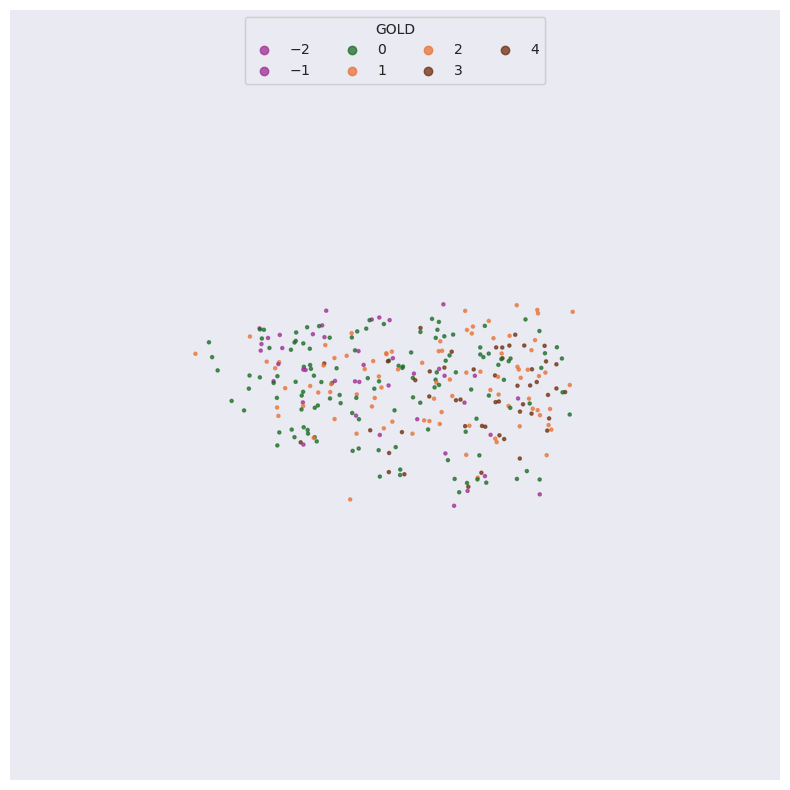

In [20]:
# A Simple Feature Selection Approach Prior to Running Manifold Learning LLE (Selecting the Top K-Related Features)
X = COPDGene_dataset.loc[:, ~COPDGene_dataset.columns.isin(['finalgold_visit', 'Visitnum', 'age_visit', 'SID', 'Batch'])]
# Select all Columns Except 'Visitnum' and 'finalgold_visit'
Y = COPDGene_dataset['finalgold_visit']
k = 30
corr = X[X.columns].corrwith(Y).abs().sort_values(ascending=False)
trimmed = X[corr[:k].index.tolist()]

# Standardize the dataset
scaler = StandardScaler()
trimmed = pd.DataFrame(scaler.fit_transform(trimmed), columns=trimmed.columns)

lle = LocallyLinearEmbedding(n_neighbors=15, n_components=2, reg=0.1533165867623197, max_iter=1000, random_state=42)
embedding = lle.fit_transform(trimmed)

# Evaluating the Quality of the Generated Manifold
reconstruction_error = lle.reconstruction_error_
neighborhood_preservation_score = compute_neighborhood_preservation(trimmed, embedding)
pairwise_distances_preservation_score_euclidean = compute_distance_preservation(trimmed, embedding)
pairwise_distances_preservation_score_manhattan = compute_distance_preservation(trimmed, embedding, 'manhattan')

print("Reconstruction Error: %s\nNeighborhood Preservation Score: %s\nPairwise Distance Preservation Score: %s" %
      (reconstruction_error,
       neighborhood_preservation_score,
       pairwise_distances_preservation_score_euclidean))
# Create a 3D scatter plot of the LLE embedding
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
custom_cmap = ListedColormap(['#A02B93', '#196B24', '#E97132', '#6E2D0C'])  # Red, Green, Blue, Yellow
sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=Y, s=5, alpha=0.7, cmap=custom_cmap)

legend1 = ax.legend(*sc.legend_elements(), loc="upper center", title="GOLD", ncol=4)
ax.add_artist(legend1)
ax.grid(False)
ax.set_axis_off()
fig.patch.set_alpha(0.0)

plt.show()

Mean Proportion of Neighbors from the Same Subject: 0.0297


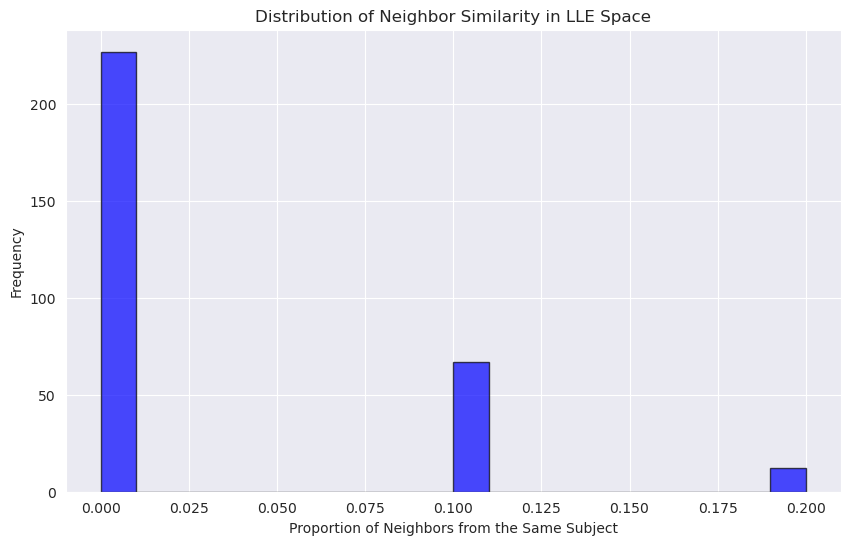

In [21]:
from sklearn.neighbors import NearestNeighbors

def compute_nearest_neighbors(embedding, n_neighbors=10):
       nbrs = NearestNeighbors(n_neighbors=n_neighbors + 1, metric='euclidean').fit(embedding)  # +1 includes the point itself
       distances, indices = nbrs.kneighbors(embedding)
       return indices[:, 1:]  # Exclude the point itself (first column)

nearest_neighbors = compute_nearest_neighbors(embedding)
def analyze_neighborhood_structure(df, nearest_neighbors):
       subject_ids = df.index
       same_subject_counts = []

       for i, neighbors in enumerate(nearest_neighbors):
              count = sum(subject_ids[i] == subject_ids[neighbor] for neighbor in neighbors)
              same_subject_counts.append(count)

       return same_subject_counts

same_subject_counts = analyze_neighborhood_structure(df, nearest_neighbors)
import matplotlib.pyplot as plt
import numpy as np

def summarize_and_plot_neighborhood(same_subject_counts, n_neighbors):
       same_subject_ratios = [count / n_neighbors for count in same_subject_counts]
       mean_ratio = np.mean(same_subject_ratios)

       print(f"Mean Proportion of Neighbors from the Same Subject: {mean_ratio:.4f}")

       # Histogram
       plt.figure(figsize=(10, 6))
       plt.hist(same_subject_ratios, bins=20, color='blue', alpha=0.7, edgecolor='black')
       plt.xlabel('Proportion of Neighbors from the Same Subject')
       plt.ylabel('Frequency')
       plt.title('Distribution of Neighbor Similarity in LLE Space')
       plt.show()

summarize_and_plot_neighborhood(same_subject_counts, n_neighbors=10)

